In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:

base_dir = "C:\Users\nacha\Downloads\archive (2)\marine-animals-dataset\versions\1"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1241 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:

class_indices = train_generator.class_indices
print("Class indices:", class_indices)


vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=vgg16_base.input, outputs=vgg16_base.get_layer("block5_pool").output)

Class indices: {'Dolphin': 0, 'Fish': 1, 'Lobster': 2, 'Octopus': 3, 'Sea Horse': 4}


In [ ]:

def extract_features_with_gap(generator, model):
    features = []
    labels = []
    for inputs_batch, labels_batch in tqdm(generator, desc="Extracting Features"):
        batch_features = model.predict(inputs_batch)
        batch_features = np.mean(batch_features, axis=(1, 2)) 
        features.append(batch_features)
        labels.append(labels_batch)
        if len(features) >= len(generator):
            break
    return np.vstack(features), np.vstack(labels)

In [ ]:

train_features, train_labels = extract_features_with_gap(train_generator, model)
valid_features, valid_labels = extract_features_with_gap(valid_generator, model)


Extracting Features:   0%|          | 0/39 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting Features:   3%|▎         | 1/39 [00:07<04:47,  7.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:   5%|▌         | 2/39 [00:13<04:07,  6.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:   8%|▊         | 3/39 [00:19<03:48,  6.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  10%|█         | 4/39 [00:26<03:43,  6.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  13%|█▎        | 5/39 [00:31<03:31,  6.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  15%|█▌        | 6/39 [00:38<03:25,  6.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  18%|█▊        | 7/39 [00:44<03:17,  6.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  21%|██        | 8/39 [00:50<03:09,  6.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  23%|██▎       | 9/39 [00:56<03:02,  6.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  26%|██▌       | 10/39 [01:02<02:58,  6.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  28%|██▊       | 11/39 [01:08<02:51,  6.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  31%|███       | 12/39 [01:14<02:44,  6.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  33%|███▎      | 13/39 [01:20<02:36,  6.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  36%|███▌      | 14/39 [01:26<02:30,  6.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  38%|███▊      | 15/39 [01:32<02:24,  6.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  41%|████      | 16/39 [01:38<02:18,  6.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  44%|████▎     | 17/39 [01:44<02:12,  6.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  46%|████▌     | 18/39 [01:50<02:05,  5.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  49%|████▊     | 19/39 [01:56<01:58,  5.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  51%|█████▏    | 20/39 [02:02<01:53,  5.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  54%|█████▍    | 21/39 [02:08<01:48,  6.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  56%|█████▋    | 22/39 [02:14<01:43,  6.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  59%|█████▉    | 23/39 [02:20<01:37,  6.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  62%|██████▏   | 24/39 [02:26<01:31,  6.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  64%|██████▍   | 25/39 [02:32<01:24,  6.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  67%|██████▋   | 26/39 [02:38<01:17,  5.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  69%|██████▉   | 27/39 [02:44<01:10,  5.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  72%|███████▏  | 28/39 [02:50<01:06,  6.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  74%|███████▍  | 29/39 [02:56<01:00,  6.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  77%|███████▋  | 30/39 [03:02<00:54,  6.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  79%|███████▉  | 31/39 [03:08<00:47,  5.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  82%|████████▏ | 32/39 [03:14<00:41,  5.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  85%|████████▍ | 33/39 [03:20<00:35,  5.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  87%|████████▋ | 34/39 [03:26<00:29,  5.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  90%|████████▉ | 35/39 [03:31<00:23,  5.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  92%|█████████▏| 36/39 [03:37<00:17,  5.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  95%|█████████▍| 37/39 [03:43<00:11,  5.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  97%|█████████▋| 38/39 [03:48<00:05,  5.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:   0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting Features:  12%|█▎        | 1/8 [00:05<00:39,  5.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  25%|██▌       | 2/8 [00:11<00:33,  5.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  38%|███▊      | 3/8 [00:16<00:27,  5.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  50%|█████     | 4/8 [00:21<00:21,  5.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  62%|██████▎   | 5/8 [00:26<00:15,  5.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  75%|███████▌  | 6/8 [00:31<00:10,  5.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting Features:  88%|████████▊ | 7/8 [00:36<00:05,  5.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting Features:  88%|████████▊ | 7/8 [00:40<00:05,  5.80s/it]


In [ ]:

all_features = np.vstack((train_features, valid_features))
all_labels = np.argmax(np.vstack((train_labels, valid_labels)), axis=1)

In [ ]:
def pca_scratch(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    eigenvectors = eigenvectors[:, :n_components]
    
    X_reduced = np.dot(X_centered, eigenvectors)
    
    return X_reduced, eigenvalues[:n_components], eigenvectors

reduced_features, eig_vals, eig_vecs = pca_scratch(all_features, n_components=50)

print("Reduced shape:", reduced_features.shape)

In [ ]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iters=300, n_init=10, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _init_centroids_kmeanspp(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        
        centroids = []
        first_idx = np.random.randint(n_samples)
        centroids.append(X[first_idx])
        
       
        for _ in range(1, self.n_clusters):
           
            dist_sq = np.min([np.sum((X - c) ** 2, axis=1) for c in centroids], axis=0)
            probs = dist_sq / np.sum(dist_sq)
            next_idx = np.random.choice(n_samples, p=probs)
            centroids.append(X[next_idx])
        
        return np.array(centroids)

    def fit(self, X):
        best_inertia = float("inf")
        best_centroids = None
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids_kmeanspp(X)
            for _ in range(self.max_iters):
             
                distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)

                
                new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
                                          for j in range(self.n_clusters)])

                
                if np.allclose(centroids, new_centroids, atol=1e-6):
                    break
                centroids = new_centroids

           
            inertia = np.sum((X - centroids[labels]) ** 2)

            
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels
        return self

num_clusters = len(class_indices)  

kmeans = KMeansScratch(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_features)

cluster_labels = kmeans.labels_
centroids = kmeans.centroids

In [ ]:
def adjusted_rand_index_scratch(labels_true, labels_pred):
    n = len(labels_true)
    contingency = {}
    
    
    for i in range(n):
        contingency.setdefault(labels_true[i], {})
        contingency[labels_true[i]].setdefault(labels_pred[i], 0)
        contingency[labels_true[i]][labels_pred[i]] += 1
    
   
    sum_comb_c = 0
    sum_comb_k = 0
    sum_comb = 0
    nC2 = comb(n, 2)
    
    for row in contingency.values():
        row_sum = sum(row.values())
        sum_comb_c += comb(row_sum, 2)
        for val in row.values():
            sum_comb += comb(val, 2)
    for j in set(labels_pred):
        col_sum = sum(contingency.get(i, {}).get(j, 0) for i in contingency)
        sum_comb_k += comb(col_sum, 2)
    
    expected_index = sum_comb_c * sum_comb_k / nC2
    max_index = (sum_comb_c + sum_comb_k) / 2
    return (sum_comb - expected_index) / (max_index - expected_index)


def silhouette_score_scratch(X, labels):
    n = len(X)
    unique_clusters = np.unique(labels)
    silhouettes = []
    
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == c] for c in unique_clusters if c != labels[i]]
        
        
        a = np.mean([np.linalg.norm(X[i] - p) for p in same_cluster if not np.array_equal(p, X[i])]) if len(same_cluster) > 1 else 0
        
        
        b = np.min([np.mean([np.linalg.norm(X[i] - p) for p in cluster]) for cluster in other_clusters])
        
        silhouettes.append((b - a) / max(a, b))
    
    return np.mean(silhouettes)


ari_score = adjusted_rand_index_scratch(all_labels, cluster_labels)
silhouette_avg = silhouette_score_scratch(reduced_features, cluster_labels)

print(f"Adjusted Rand Index (scratch): {ari_score:.4f}")
print(f"Silhouette Score (scratch): {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.1104
Silhouette Score: 0.0712


In [ ]:
def silhouette_score_manual(X, labels):
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    distances = cdist(X, X, metric='euclidean')
    
    silhouettes = []
    for i in range(n_samples):
        own_cluster = labels[i]
        
        
        mask_same = labels == own_cluster
        a_i = np.mean(distances[i, mask_same][distances[i, mask_same] > 0]) if np.sum(mask_same) > 1 else 0
        
       
        b_i = np.inf
        for lbl in unique_labels:
            if lbl == own_cluster:
                continue
            mask_other = labels == lbl
            b_i = min(b_i, np.mean(distances[i, mask_other]))
        
       
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0
        silhouettes.append(s_i)
    
    return np.mean(silhouettes)

def calinski_harabasz_manual(X, labels):
    n_samples, n_features = X.shape
    unique_labels = np.unique(labels)
    k = len(unique_labels)

    overall_mean = np.mean(X, axis=0)

    
    B, W = 0, 0
    for lbl in unique_labels:
        cluster_points = X[labels == lbl]
        n_cluster = cluster_points.shape[0]
        cluster_mean = np.mean(cluster_points, axis=0)

     
        B += n_cluster * np.sum((cluster_mean - overall_mean) ** 2)

        W += np.sum((cluster_points - cluster_mean) ** 2)

    return (B / (k - 1)) / (W / (n_samples - k))


def davies_bouldin_manual(X, labels):
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    
    cluster_means = []
    S = [] 

   
    for lbl in unique_labels:
        cluster_points = X[labels == lbl]
        cluster_mean = np.mean(cluster_points, axis=0)
        cluster_means.append(cluster_mean)
        S.append(np.mean(np.linalg.norm(cluster_points - cluster_mean, axis=1)))
    
    cluster_means = np.array(cluster_means)
    S = np.array(S)

    
    db_indexes = []
    for i in range(k):
        max_ratio = -np.inf
        for j in range(k):
            if i != j:
                M_ij = np.linalg.norm(cluster_means[i] - cluster_means[j])
                ratio = (S[i] + S[j]) / M_ij if M_ij > 0 else np.inf
                max_ratio = max(max_ratio, ratio)
        db_indexes.append(max_ratio)
    
    return np.mean(db_indexes)



silhouette_avg = silhouette_score_manual(reduced_features, cluster_labels)
calinski_harabasz = calinski_harabasz_manual(reduced_features, cluster_labels)
davies_bouldin = davies_bouldin_manual(reduced_features, cluster_labels)

print("Silhouette Score (manual):", silhouette_avg)
print("Calinski-Harabasz Score (manual):", calinski_harabasz)
print("Davies-Bouldin Index (manual):", davies_bouldin)

Silhouette Score: 0.07118072
Calinski-Harabasz Score: 127.73536531502735
Davies-Bouldin Index: 2.6642565494158212


In [ ]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

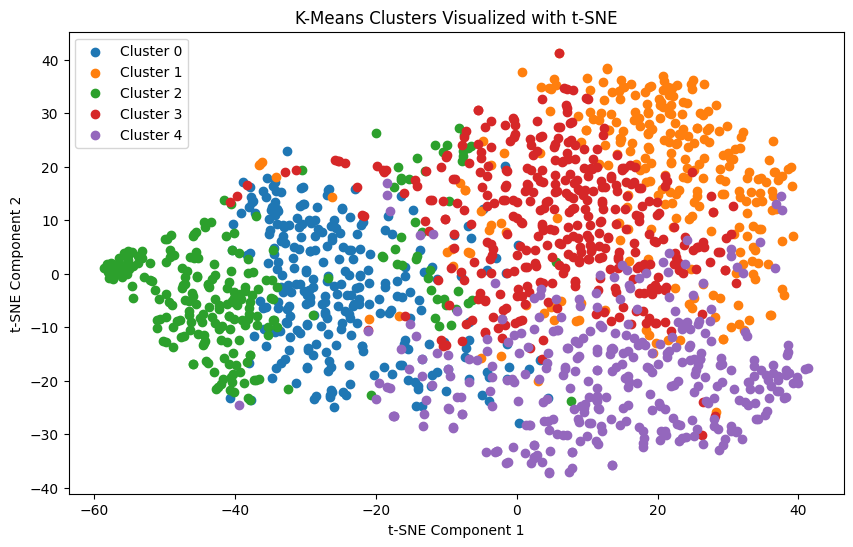

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    indices = np.where(cluster_labels == cluster_id)
    plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=f"Cluster {cluster_id}")

plt.title("K-Means Clusters Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()